In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install bs4
!pip install requests

  Preparing metadata (setup.py) ... - done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=f395749a895074779f20301ec895ae27df9db3e9eb79e13e1f7a33e1ecedb98b
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [3]:
import requests
import bs4
import pandas as pd


In [4]:
pages=[]
prices=[]
titles=[]
ratings=[]
urls=[]

In [5]:
df=requests.get('https://books.toscrape.com/')

In [6]:
bsp=bs4.BeautifulSoup(df.text,'html')

In [7]:
for t in bsp.findAll('h3'):
    titless=t.getText()
    titles.append(titless)

In [8]:
print(titles)

['A Light in the ...', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History ...', 'The Requiem Red', 'The Dirty Little Secrets ...', 'The Coming Woman: A ...', 'The Boys in the ...', 'The Black Maria', 'Starving Hearts (Triangular Trade ...', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little ...", 'Rip it Up and ...', 'Our Band Could Be ...', 'Olio', 'Mesaerion: The Best Science ...', 'Libertarianism for Beginners', "It's Only the Himalayas"]


In [9]:
for p in bsp.find_all('p', class_='price_color'): #the 'p' tag is in the 'price color' class. NB. Make sure to add underscore to class (class_) in order to differentiate it from python inbuilt class
    price=p.getText()
    prices.append(price)


In [10]:
print(prices)


['Â£51.77', 'Â£53.74', 'Â£50.10', 'Â£47.82', 'Â£54.23', 'Â£22.65', 'Â£33.34', 'Â£17.93', 'Â£22.60', 'Â£52.15', 'Â£13.99', 'Â£20.66', 'Â£17.46', 'Â£52.29', 'Â£35.02', 'Â£57.25', 'Â£23.88', 'Â£37.59', 'Â£51.33', 'Â£45.17']


In [11]:
for r in bsp.find_all('p',class_='star-rating'):
    for k,v in r.attrs.items(): 
        star=v[1]
        ratings.append(star)
       
        


In [12]:
print(ratings)


['Three', 'One', 'One', 'Four', 'Five', 'One', 'Four', 'Three', 'Four', 'One', 'Two', 'Four', 'Five', 'Five', 'Five', 'Three', 'One', 'One', 'Two', 'Two']


## IMAGE URLS

In [13]:
divs=bsp.find_all('div',class_='image_container') 
for thumbs in divs:
    tagss=thumbs.find('img',class_='thumbnail')
    links='http://books.toscrape.com/' + str(tagss['src'])
    newlinks=links.replace('..','') 
    urls.append(newlinks)
    

In [14]:

divs

[<div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/soumission_998/index.html"><img alt="Soumission" class="thumbnail" src="media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/sharp-objects_997/index.html"><img alt="Sharp Objects" class="thumbnail" src="media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html"><img alt="Sapiens: A Brief History of Humankind" class="thumbnail" src="media

In [15]:
urls

['http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'http://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'http://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'http://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'http://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'http://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'http://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'http://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'http://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'http://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'http://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'http://books.toscrape.com/media/cache/10/48/1048f63d3b5061cd2f4

In [16]:
newlinks

'http://books.toscrape.com/media/cache/27/a5/27a53d0bb95bdd88288eaf66c9230d7e.jpg'

In [17]:
web_data={'Title':titles,'Price':prices,'Ratings':ratings,'URL':urls}

In [18]:
print(len(titles))
print(len(urls))
print(len(prices))
print(len(ratings))

20
20
20
20


In [19]:
df=pd.DataFrame(web_data)

In [20]:
df.index+=1
df

,Title,Price,Ratings,URL
1,A Light in the ...,Â£51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
2,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
3,Soumission,Â£50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
4,Sharp Objects,Â£47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
5,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
6,The Requiem Red,Â£22.65,One,http://books.toscrape.com/media/cache/68/33/68...
7,The Dirty Little Secrets ...,Â£33.34,Four,http://books.toscrape.com/media/cache/92/27/92...
8,The Coming Woman: A ...,Â£17.93,Three,http://books.toscrape.com/media/cache/3d/54/3d...
9,The Boys in the ...,Â£22.60,Four,http://books.toscrape.com/media/cache/66/88/66...
10,The Black Maria,Â£52.15,One,http://books.toscrape.com/media/cache/58/46/58...


In [21]:
df['Price']=df['Price'].str.replace('Â£','')

In [22]:
df['Ratings']=df['Ratings'].replace({'Three':3,'One':1,'Two':2,'Four':4,'Five':5})

In [23]:
df.sort_values(by='Price',ascending=False)

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,3,http://books.toscrape.com/media/cache/54/60/54...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com/media/cache/be/a5/be...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com/media/cache/26/0c/26...
14,Scott Pilgrim's Precious Little ...,52.29,5,http://books.toscrape.com/media/cache/94/b1/94...
10,The Black Maria,52.15,1,http://books.toscrape.com/media/cache/58/46/58...
1,A Light in the ...,51.77,3,http://books.toscrape.com/media/cache/2c/da/2c...
19,Libertarianism for Beginners,51.33,2,http://books.toscrape.com/media/cache/0b/bc/0b...
3,Soumission,50.10,1,http://books.toscrape.com/media/cache/3e/ef/3e...
4,Sharp Objects,47.82,4,http://books.toscrape.com/media/cache/32/51/32...
20,It's Only the Himalayas,45.17,2,http://books.toscrape.com/media/cache/27/a5/27...


In [24]:
df.dtypes

Title      object
Price      object
Ratings     int64
URL        object
dtype: object

In [25]:
df['Price']=df['Price'].astype(float)

In [26]:
df.corr()

,Price,Ratings
Price,1.000000,-0.075857
Ratings,-0.075857,1.000000


<AxesSubplot:>

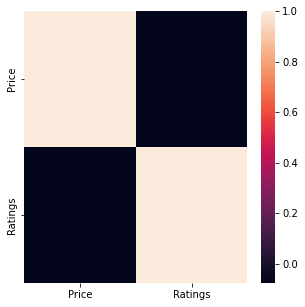

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5,5))
sns.heatmap(df.corr())